# Description

Make plots to show the computational complexity results comparing all coefficients.

# Modules loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ccc import conf

# Settings

In [2]:
INPUT_FILENAME_TEMPLATE = "time_test"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
COEF_COMP_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp"
COEF_COMP_DIR.mkdir(parents=True, exist_ok=True)
display(COEF_COMP_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp')

In [5]:
OUTPUT_FIGURE_DIR = COEF_COMP_DIR / "time_test"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/time_test')

In [6]:
INPUT_DIR = conf.RESULTS_DIR / "time_test"
display(INPUT_DIR)

PosixPath('/opt/data/results/time_test')

# Load results

In [7]:
time_results = pd.read_pickle(INPUT_DIR / f"{INPUT_FILENAME_TEMPLATE}.pkl")

In [8]:
time_results.shape

(10660, 4)

In [9]:
time_results.head()

,data_size,method,time,sim
0,100,p-1,0.000098,-0.085291
1,100,p-1,0.000035,-0.174309
2,100,p-1,0.000037,0.004494
3,100,p-1,0.000031,-0.035394
4,100,p-1,0.000030,0.066687


In [10]:
time_results["method"].unique()

array(['p-1', 's-1', 'cm-1', 'mic_e-1', 'mic-1', 'p-3', 's-3', 'cm-3',
       'mic_e-3', 'mic-3'], dtype=object)

# Processing

In [11]:
time_results = time_results.replace(
    {
        "method": {
            "p-1": "Pearson (1 core)",
            "s-1": "Spearman (1 core)",
            "cm-1": "CCC (1 core)",
            "mic-1": "MIC (1 core)",
            "mic_e-1": "MICe (1 core)",
            "p-3": "Pearson (3 cores)",
            "s-3": "Spearman (3 cores)",
            "cm-3": "CCC (3 cores)",
            "mic-3": "MIC (3 cores)",
            "mic_e-3": "MICe (3 cores)",
        }
    }
)

In [12]:
time_results.shape

(10660, 4)

In [13]:
time_results.head()

,data_size,method,time,sim
0,100,Pearson (1 core),0.000098,-0.085291
1,100,Pearson (1 core),0.000035,-0.174309
2,100,Pearson (1 core),0.000037,0.004494
3,100,Pearson (1 core),0.000031,-0.035394
4,100,Pearson (1 core),0.000030,0.066687


# Run numbers

In [14]:
plot_data = time_results

In [15]:
run_numbers = (
    plot_data[
        plot_data["method"].str.contains("1 core", regex=False)
        | plot_data["method"].str.contains("CCC (3 cores)", regex=False)
    ]
    .groupby(["data_size", "method"])["time"]
    .describe()
)
display(run_numbers)

count       mean       std        min  \
data_size method                                                      
100       CCC (1 core)       1000.0   0.000641  0.000025   0.000623   
          CCC (3 cores)      1000.0   0.001110  0.000416   0.000853   
          MIC (1 core)       1000.0   0.000724  0.000026   0.000635   
          MICe (1 core)      1000.0   0.000675  0.000022   0.000604   
          Pearson (1 core)   1000.0   0.000031  0.000002   0.000028   
          Spearman (1 core)  1000.0   0.000217  0.000017   0.000205   
500       CCC (1 core)         10.0   0.000932  0.000034   0.000911   
          CCC (3 cores)        10.0   0.001258  0.000292   0.001080   
          MIC (1 core)         10.0   0.011612  0.000258   0.011189   
          MICe (1 core)        10.0   0.008890  0.000098   0.008685   
          Pearson (1 core)     10.0   0.000041  0.000013   0.000033   
          Spearman (1 core)    10.0   0.000273  0.000023   0.000260   
1000      CCC (1 core)         10.0   0.001398  0.000047   0.001332   
          CCC (3 cores)        10.0   0.001564  0.000341   0.001332   
          MIC (1 core)         10.0   0.037072  0.000457   0.036463   
          MICe (1 core)        10.0   0.024851  0.000125   0.024646   
          Pearson (1 core)     10.0   0.000040  0.000017   0.000033   
          Spearman (1 core)    10.0   0.000319  0.000024   0.000301   
5000      CCC (1 core)         10.0   0.006685  0.000091   0.006585   
          CCC (3 cores)        10.0   0.004830  0.001123   0.003883   
          MIC (1 core)         10.0   0.510705  0.001836   0.507880   
          MICe (1 core)        10.0   0.228000  0.000698   0.227258   
          Pearson (1 core)     10.0   0.000050  0.000012   0.000044   
          Spearman (1 core)    10.0   0.000661  0.000026   0.000634   
10000     CCC (1 core)         10.0   0.014375  0.000187   0.014085   
          CCC (3 cores)        10.0   0.008727  0.001044   0.007567   
          MIC (1 core)         10.0   1.592554  0.010670   1.575866   
          MICe (1 core)        10.0   0.572581  0.001167   0.570966   
          Pearson (1 core)     10.0   0.000064  0.000015   0.000056   
          Spearman (1 core)    10.0   0.001158  0.000027   0.001128   
50000     CCC (1 core)         10.0   0.082006  0.000460   0.081297   
          CCC (3 cores)        10.0   0.043132  0.000550   0.042416   
          MICe (1 core)        10.0   4.843016  0.005246   4.832381   
          Pearson (1 core)     10.0   0.000182  0.000026   0.000163   
          Spearman (1 core)    10.0   0.006136  0.000160   0.005979   
100000    CCC (1 core)         10.0   0.175137  0.000671   0.174232   
          CCC (3 cores)        10.0   0.090907  0.001929   0.088514   
          Pearson (1 core)     10.0   0.000417  0.000249   0.000313   
          Spearman (1 core)    10.0   0.011882  0.000409   0.011642   
1000000   CCC (1 core)         10.0   2.296490  0.065356   2.219242   
          CCC (3 cores)        10.0   1.275980  0.008927   1.265975   
          Pearson (1 core)     10.0   0.007408  0.001242   0.006026   
          Spearman (1 core)    10.0   0.172611  0.001251   0.170362   
10000000  CCC (1 core)         10.0  40.157600  0.173438  39.843292   
          CCC (3 cores)        10.0  21.885837  0.103896  21.705721   
          Pearson (1 core)     10.0   0.094267  0.000529   0.093734   
          Spearman (1 core)    10.0   2.954011  0.010732   2.941881   

                                   25%        50%        75%        max  
data_size method                                                         
100       CCC (1 core)        0.000631   0.000635   0.000640   0.001048  
          CCC (3 cores)       0.000913   0.000944   0.001109   0.004993  
          MIC (1 core)        0.000707   0.000723   0.000741   0.000879  
          MICe (1 core)       0.000659   0.000676   0.000691   0.000740  
          Pearson (1 core)    0.000030   0.000031   0.000031   0.000098  
          Spearman (1 core)   0.

In [29]:
# this is necessary to make sure we did not mix results when running the time test notebooks
# that could happen if the notebooks are run separately without running them all together
assert run_numbers["count"].unique().shape[0] == 2

# Plot

In [16]:
hue_order = sorted(time_results["method"].unique())

In [17]:
hue_order

['CCC (1 core)',
 'CCC (3 cores)',
 'MIC (1 core)',
 'MIC (3 cores)',
 'MICe (1 core)',
 'MICe (3 cores)',
 'Pearson (1 core)',
 'Pearson (3 cores)',
 'Spearman (1 core)',
 'Spearman (3 cores)']

In [18]:
deep_colors = sns.color_palette("Paired")
display(deep_colors)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [19]:
def format_data_size(x):
    if x < 1000:
        return f"{int(x)}"
    elif x < 1000000:
        return f"{int(x/1000)}k"

    return f"{int(x/1000000)}m"


plot_data = plot_data.assign(data_size=plot_data["data_size"].apply(format_data_size))

## First analysis

Here I take a look if using more than 1 core benefits methods.

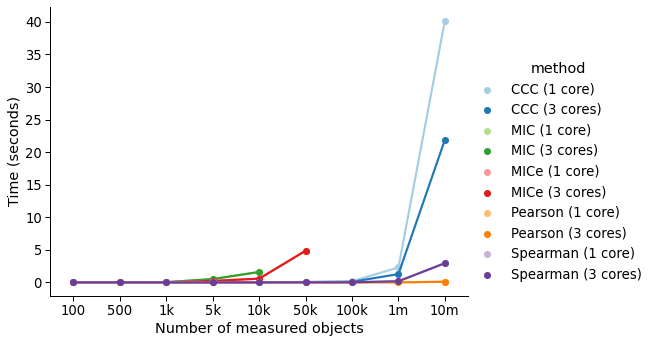

In [20]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.4,
    )

    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds)")

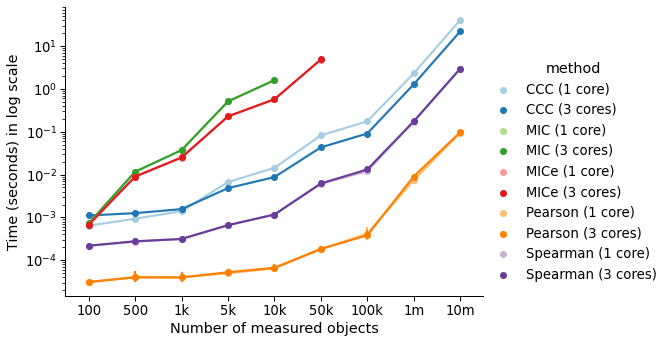

In [21]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.4,
    )

    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds) in log scale")

    g.ax.set_yscale("log")

Only CCC is really taking advantage of more than 1 core, so I'll remove the rest below.

# Final analysis

In [22]:
# select runs with 3 cores for the other methods
plot_data = plot_data.replace(
    {
        "method": {
            "Pearson (3 cores)": "Pearson",
            "Spearman (3 cores)": "Spearman",
            "MIC (3 cores)": "MIC",
            "MICe (3 cores)": r"$\mathregular{MIC_e}$",
        }
    }
)

In [23]:
plot_data["method"].unique()

array(['Pearson (1 core)', 'Spearman (1 core)', 'CCC (1 core)',
       'MICe (1 core)', 'MIC (1 core)', 'Pearson', 'Spearman',
       'CCC (3 cores)', '$\\mathregular{MIC_e}$', 'MIC'], dtype=object)

In [24]:
hue_order = [
    "MIC",
    r"$\mathregular{MIC_e}$",
    "CCC (1 core)",
    "CCC (3 cores)",
    "Spearman",
    "Pearson",
]

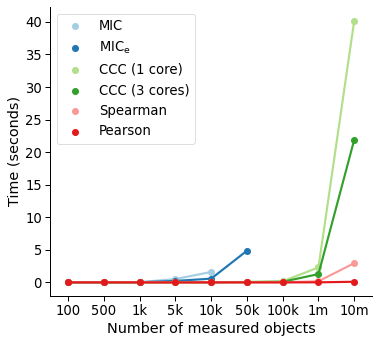

In [25]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.1,
        legend=False,
    )

    plt.legend(loc="best")
    plt.xlabel("Number of measured objects")
    plt.ylabel("Time (seconds)")

    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}.svg",
        bbox_inches="tight",
        facecolor="white",
    )

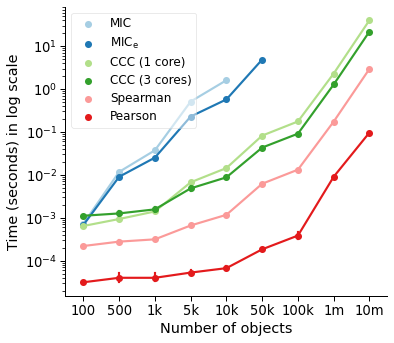

In [26]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.1,
        legend=False,
    )

    plt.legend(loc="best", fontsize="small", framealpha=0.5)
    plt.xlabel("Number of objects")
    plt.ylabel("Time (seconds) in log scale")
    g.ax.set_yscale("log")

    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}-log.svg",
        bbox_inches="tight",
        facecolor="white",
    )

# Create final figure

In [27]:
from svgutils.compose import Figure, SVG

In [28]:
Figure(
    "19.79335cm",
    "17.09335cm",
    # white background
    SVG(COEF_COMP_DIR / "white_background.svg").scale(0.5).move(0, 0),
    # SVG(OUTPUT_FIGURE_DIR / "time_test.svg").scale(0.05),
    SVG(OUTPUT_FIGURE_DIR / "time_test-log.svg").scale(0.05),
).save(OUTPUT_FIGURE_DIR / "time_test-main.svg")

Compile the manuscript with manubot and make sure the image has a white background and displays properly.